In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
df2=pd.read_csv("../data/test.csv")
df=pd.read_csv("../data/train.csv")
data=pd.DataFrame(df)

In [3]:
df.head( )


,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [4]:
df.shape


(576, 12)

In [5]:
df2.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [6]:
df.columns

Index(['profile pic', 'nums/length username', 'fullname words',
       'nums/length fullname', 'name==username', 'description length',
       'external URL', 'private', '#posts', '#followers', '#follows', 'fake'],
      dtype='object')

In [7]:
df.groupby("fullname words")["fake"].sum()

fullname words
0      27
1     208
2      41
3       9
4       2
5       1
6       0
10      0
12      0
Name: fake, dtype: int64

C:\Users\whoam\AppData\Local\Temp\ipykernel_3248\4127581684.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fake', data=df, palette='Set2')


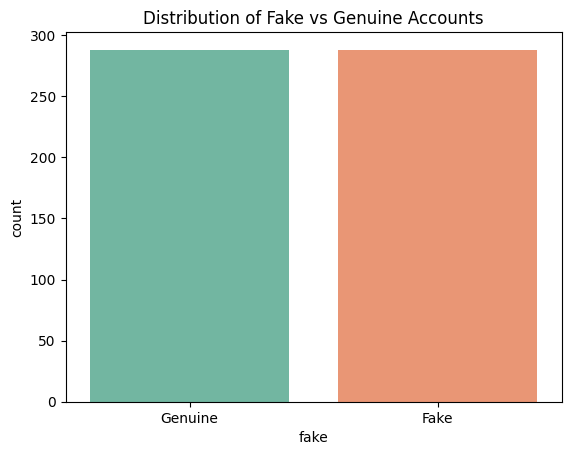

In [8]:
sns.countplot(x='fake', data=df, palette='Set2')
plt.title("Distribution of Fake vs Genuine Accounts")
plt.xticks([0, 1], ["Genuine", "Fake"])
plt.show()

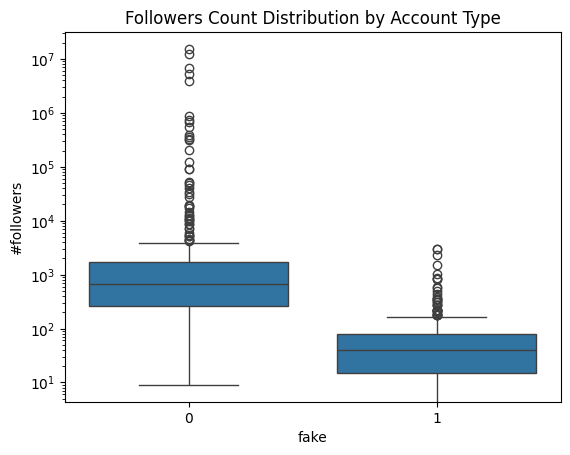

In [9]:
sns.boxplot(x="fake", y="#followers", data=df)
plt.title("Followers Count Distribution by Account Type")
plt.yscale("log")  
plt.show()


In [10]:
df.groupby('profile pic')[['description length','#followers','#follows']].value_counts()

profile pic  description length  #followers  #follows
0            0                   0           0           3
                                 15          1           2
                                 0           71          2
                                 49          0           2
                                 46          4           1
                                                        ..
1            0                   13          77          1
                                 12          192         1
                                             77          1
                                 11          60          1
             150                 1383        7500        1
Name: count, Length: 569, dtype: int64

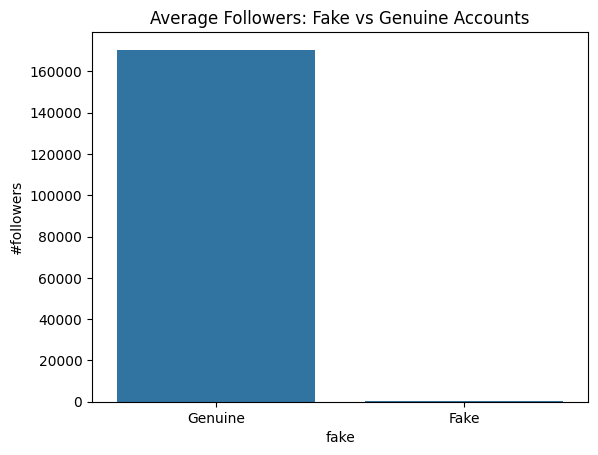

In [11]:
avg_followers = data.groupby("fake")["#followers"].mean().reset_index()
avg_followers["fake"] = avg_followers["fake"].map({0:"Genuine", 1:"Fake"})

sns.barplot(x="fake", y="#followers", data=avg_followers)
plt.title("Average Followers: Fake vs Genuine Accounts")
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
df['ratio_followers']=df['#followers'] / (df['#follows'] + 1)
X=df[['ratio_followers','#followers','#follows','#posts','private','profile pic']]
y=df['fake']
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=42 )
model=RandomForestClassifier(n_estimators=100,random_state=42)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
print("accuracy of y predict",accuracy_score(y_test,y_predict))
print("\n Classification report: \n",classification_report(y_test,y_predict))

feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importances)


accuracy of y predict 0.9248554913294798

 Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.91      0.93        93
           1       0.90      0.94      0.92        80

    accuracy                           0.92       173
   macro avg       0.92      0.93      0.92       173
weighted avg       0.93      0.92      0.92       173

           Feature  Importance
1       #followers    0.315508
3           #posts    0.243270
0  ratio_followers    0.173121
5      profile pic    0.144099
2         #follows    0.108468
4          private    0.015535
